In [ ]:
# COVID-19 Global Data Tracker
# Author: Fabian Kipyegon Rono
# Date: 2025-09-03

# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Cell 2: Load and explore the dataset
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (429435, 67)

Column Names:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'pe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
# Cell 3: Data cleaning and preprocessing
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for countries (exclude continent aggregates)
exclude_locations = ['World', 'European Union', 'International', 'Asia', 'Europe', 'North America', 
                     'South America', 'Africa', 'Oceania', 'High income', 'Upper middle income', 
                     'Lower middle income', 'Low income']
df = df[~df['location'].isin(exclude_locations)]

# Select key columns for analysis
key_columns = ['date', 'location', 'continent', 'population', 'total_cases', 'new_cases',
               'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
               'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred']

df_clean = df[key_columns].copy()

# Handle missing values
df_clean['new_cases'] = df_clean['new_cases'].fillna(0)
df_clean['new_deaths'] = df_clean['new_deaths'].fillna(0)

# Forward fill for cumulative values to handle missing data
df_clean = df_clean.sort_values(['location', 'date'])
df_clean[['total_cases', 'total_deaths', 'people_vaccinated', 
          'people_fully_vaccinated']] = df_clean.groupby('location')[['total_cases', 'total_deaths', 
                                                                      'people_vaccinated', 
                                                                      'people_fully_vaccinated']].ffill()

# Calculate additional metrics
df_clean['case_fatality_rate'] = (df_clean['total_deaths'] / df_clean['total_cases']) * 100
df_clean['vaccination_rate'] = (df_clean['people_vaccinated'] / df_clean['population']) * 100
df_clean['full_vaccination_rate'] = (df_clean['people_fully_vaccinated'] / df_clean['population']) * 100

print("Data cleaning completed!")
print("Number of countries:", df_clean['location'].nunique())
df_clean.head()

Data cleaning completed!
Number of countries: 248


,date,location,continent,population,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,case_fatality_rate,vaccination_rate,full_vaccination_rate
0,2020-01-05,Afghanistan,Asia,41128772,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,Afghanistan,Asia,41128772,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,Afghanistan,Asia,41128772,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,Afghanistan,Asia,41128772,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,Afghanistan,Asia,41128772,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cell 4: Get the latest data for each country
latest_data = df_clean.sort_values('date').groupby('location').last().reset_index()

# Top 10 countries by total cases
top_countries_cases = latest_data.nlargest(10, 'total_cases')[['location', 'total_cases', 'total_deaths']]
top_countries_cases['mortality_rate'] = (top_countries_cases['total_deaths'] / top_countries_cases['total_cases']) * 100

print("Top 10 countries by total cases:")
top_countries_cases

Top 10 countries by total cases:


,location,total_cases,total_deaths,mortality_rate
94,High-income countries,429044049.0,2997359.0,0.698613
235,Upper-middle-income countries,251753518.0,2824452.0,1.121912
69,European Union (27),185822587.0,1262988.0,0.679674
233,United States,103436829.0,1193165.0,1.153520
42,China,99373219.0,122304.0,0.123075
126,Lower-middle-income countries,91954400.0,1188026.0,1.291973
99,India,45041748.0,533623.0,1.184730
74,France,38997490.0,168091.0,0.431030
80,Germany,38437756.0,174979.0,0.455227
28,Brazil,37511921.0,702116.0,1.871714


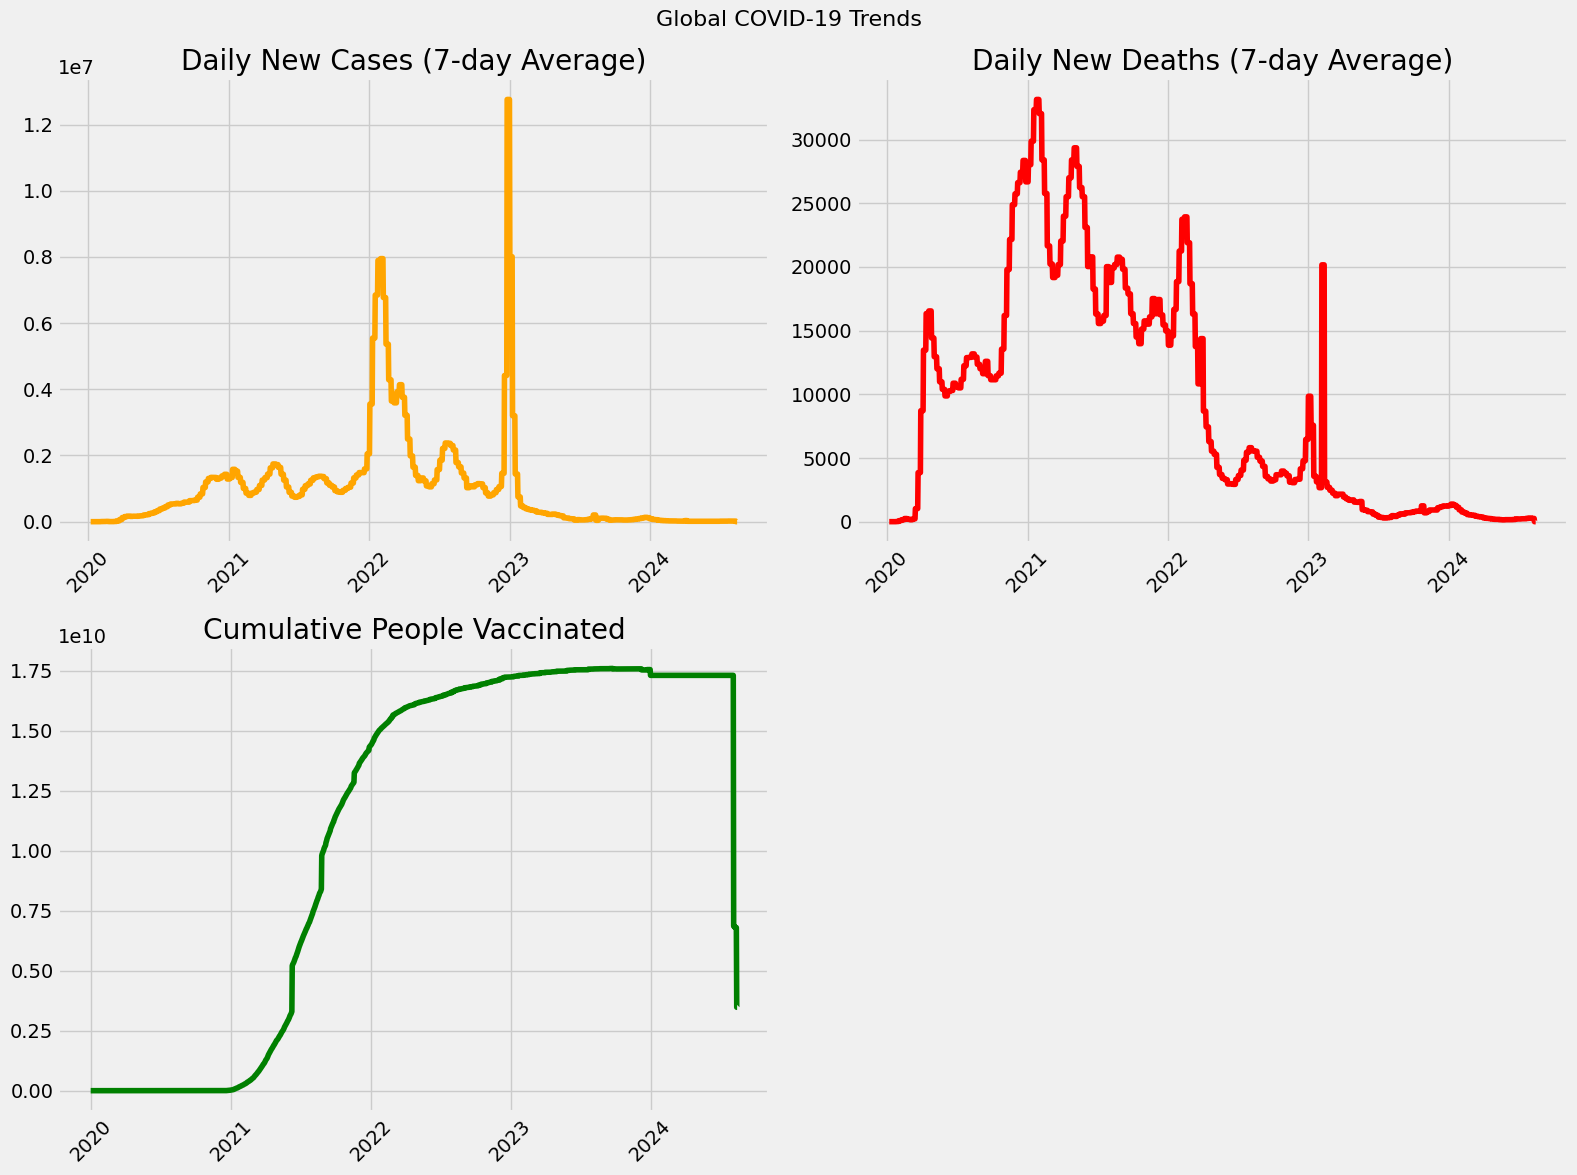

In [5]:
# Cell 5: Global trends over time
# Aggregate global data by date
global_by_date = df_clean.groupby('date').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'people_vaccinated': 'sum'
}).reset_index()

# Calculate 7-day moving averages to smooth the curves
global_by_date['new_cases_7day_avg'] = global_by_date['new_cases'].rolling(window=7).mean()
global_by_date['new_deaths_7day_avg'] = global_by_date['new_deaths'].rolling(window=7).mean()

# Plot global trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Global COVID-19 Trends', fontsize=16)

# New cases
axes[0, 0].plot(global_by_date['date'], global_by_date['new_cases_7day_avg'], color='orange')
axes[0, 0].set_title('Daily New Cases (7-day Average)')
axes[0, 0].tick_params(axis='x', rotation=45)

# New deaths
axes[0, 1].plot(global_by_date['date'], global_by_date['new_deaths_7day_avg'], color='red')
axes[0, 1].set_title('Daily New Deaths (7-day Average)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Cumulative vaccinations
axes[1, 0].plot(global_by_date['date'], global_by_date['people_vaccinated'].fillna(0), color='green')
axes[1, 0].set_title('Cumulative People Vaccinated')
axes[1, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

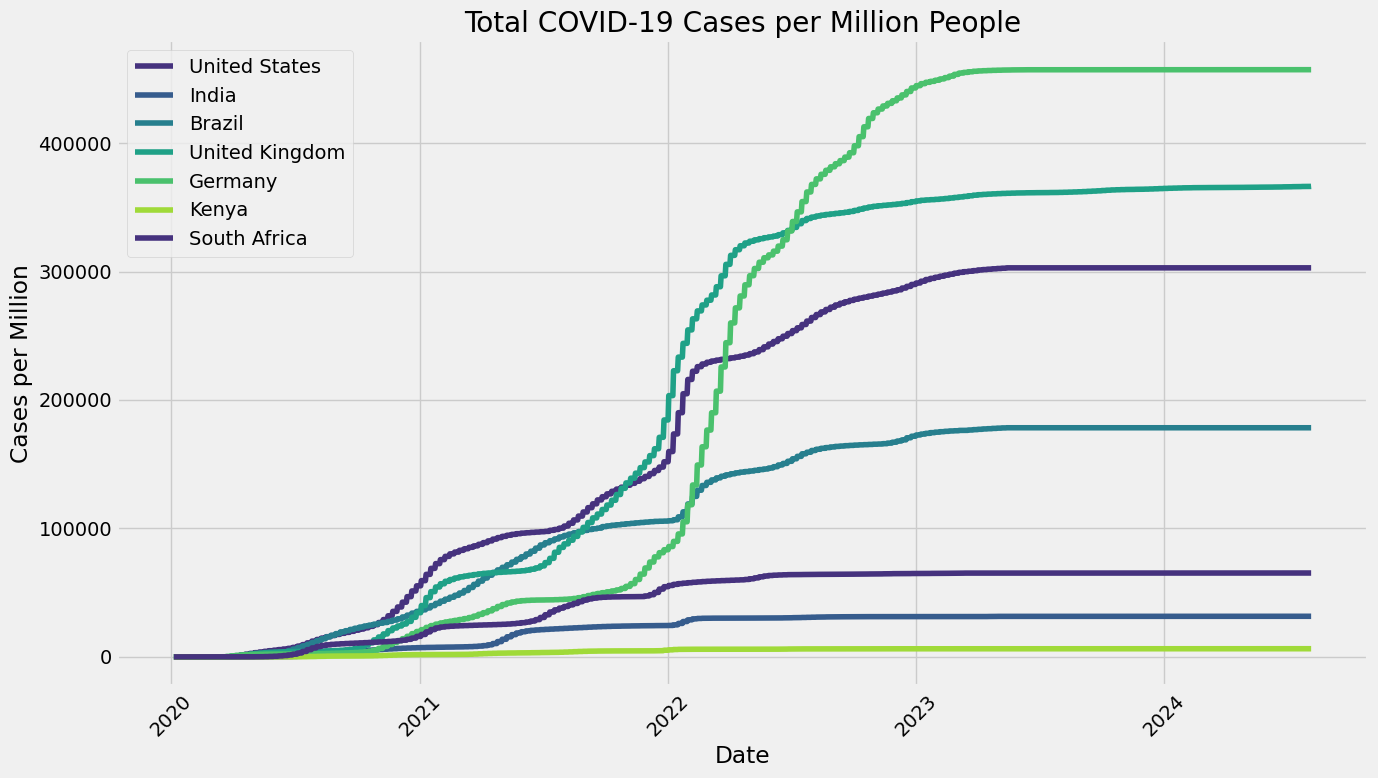

In [6]:
# Cell 6: Compare selected countries
selected_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany', 'Kenya', 'South Africa']

# Filter data for selected countries
selected_data = df_clean[df_clean['location'].isin(selected_countries)]

# Plot comparison of total cases per million
plt.figure(figsize=(14, 8))
for country in selected_countries:
    country_data = selected_data[selected_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases_per_million'], label=country)

plt.title('Total COVID-19 Cases per Million People')
plt.xlabel('Date')
plt.ylabel('Cases per Million')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

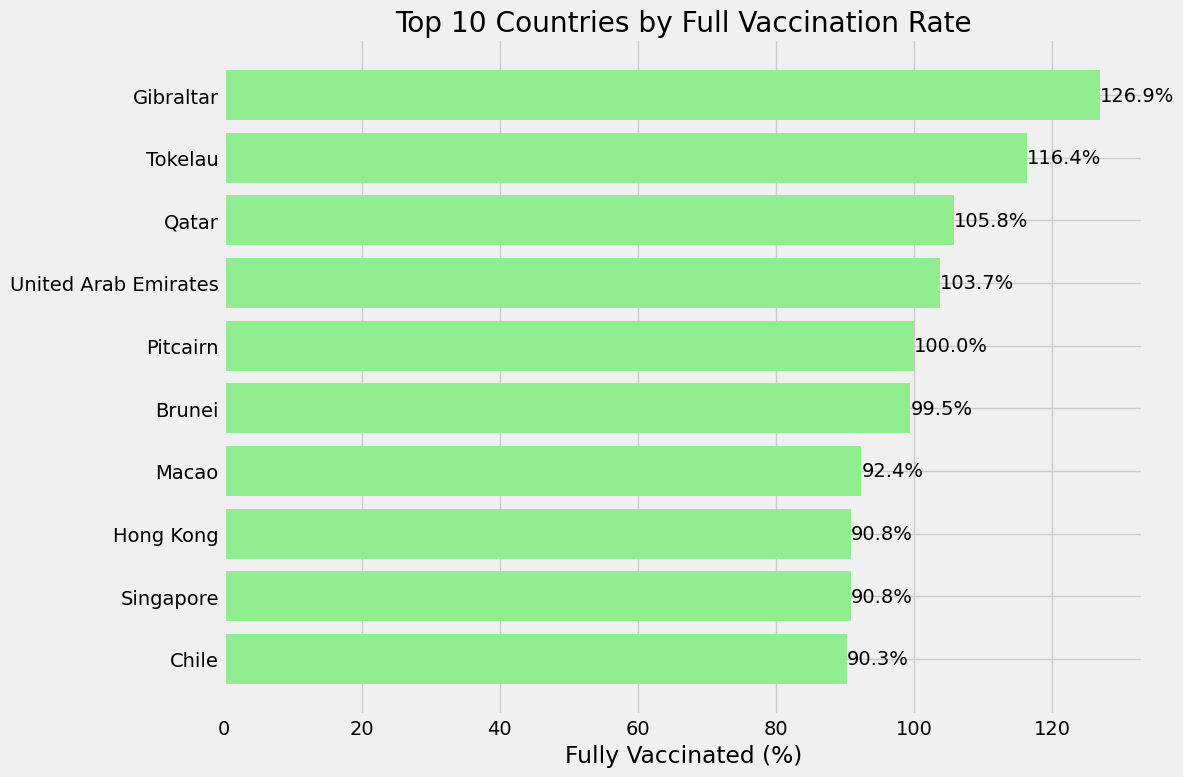

In [7]:
# Cell 7: Compare vaccination progress
# Get latest vaccination data
vaccination_data = latest_data[['location', 'continent', 'vaccination_rate', 'full_vaccination_rate']].dropna()

# Top 10 vaccinated countries
top_vaccinated = vaccination_data.nlargest(10, 'full_vaccination_rate')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_vaccinated['location'], top_vaccinated['full_vaccination_rate'], color='lightgreen')
plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Fully Vaccinated (%)')
plt.title('Top 10 Countries by Full Vaccination Rate')
plt.gca().invert_yaxis()  # Display highest at top
plt.tight_layout()
plt.show()

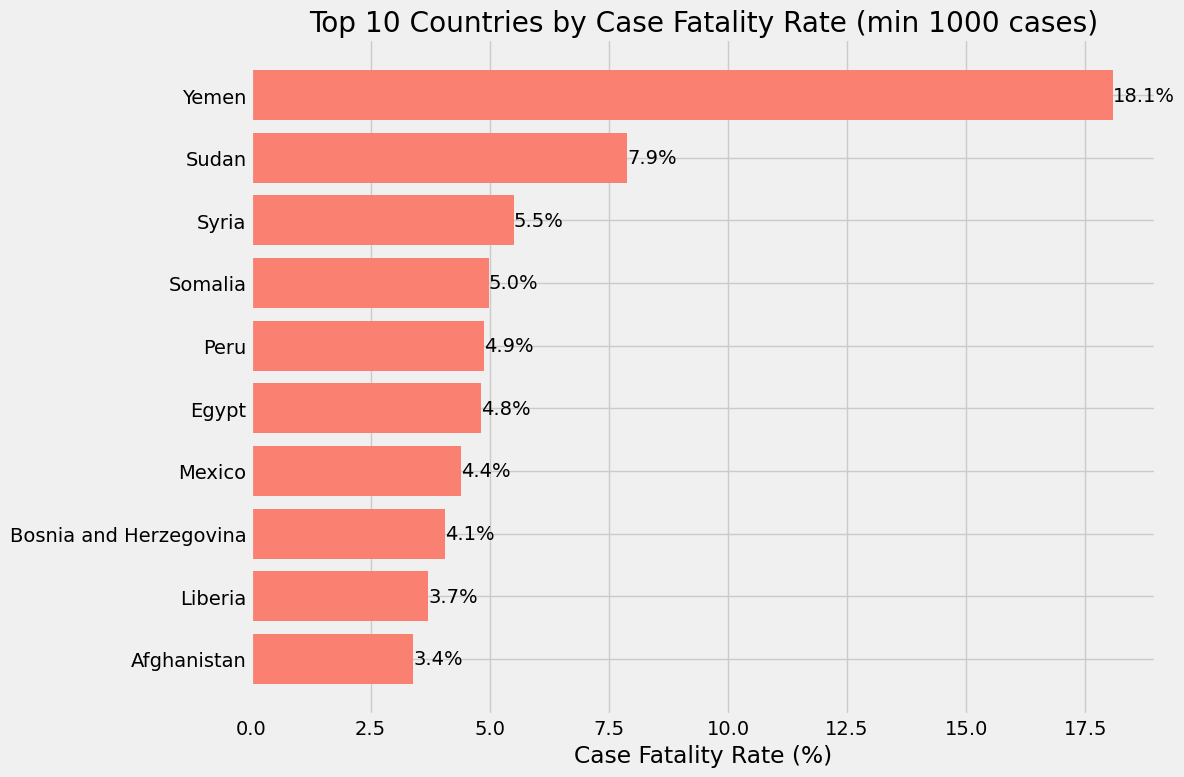

In [8]:
# Cell 8: Case fatality rate analysis
# Calculate case fatality rate for countries with at least 1000 cases
cfr_data = latest_data[latest_data['total_cases'] > 1000]
cfr_data = cfr_data[['location', 'continent', 'total_cases', 'total_deaths', 'case_fatality_rate']].dropna()

# Top 10 countries by case fatality rate
top_cfr = cfr_data.nlargest(10, 'case_fatality_rate')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_cfr['location'], top_cfr['case_fatality_rate'], color='salmon')
plt.bar_label(bars, fmt='%.1f%%')
plt.xlabel('Case Fatality Rate (%)')
plt.title('Top 10 Countries by Case Fatality Rate (min 1000 cases)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

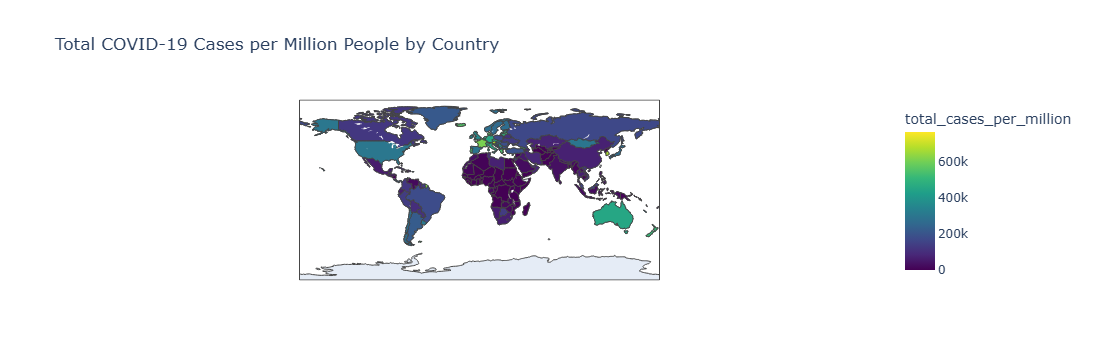

In [9]:
# Cell 9: Create a choropleth map of total cases per million
# Prepare data for the map
map_data = latest_data[['location', 'total_cases_per_million']].dropna()

# Create the choropleth map
fig = px.choropleth(map_data, 
                    locations="location", 
                    locationmode='country names',
                    color="total_cases_per_million", 
                    hover_name="location",
                    color_continuous_scale="Viridis",
                    title="Total COVID-19 Cases per Million People by Country")
fig.show()

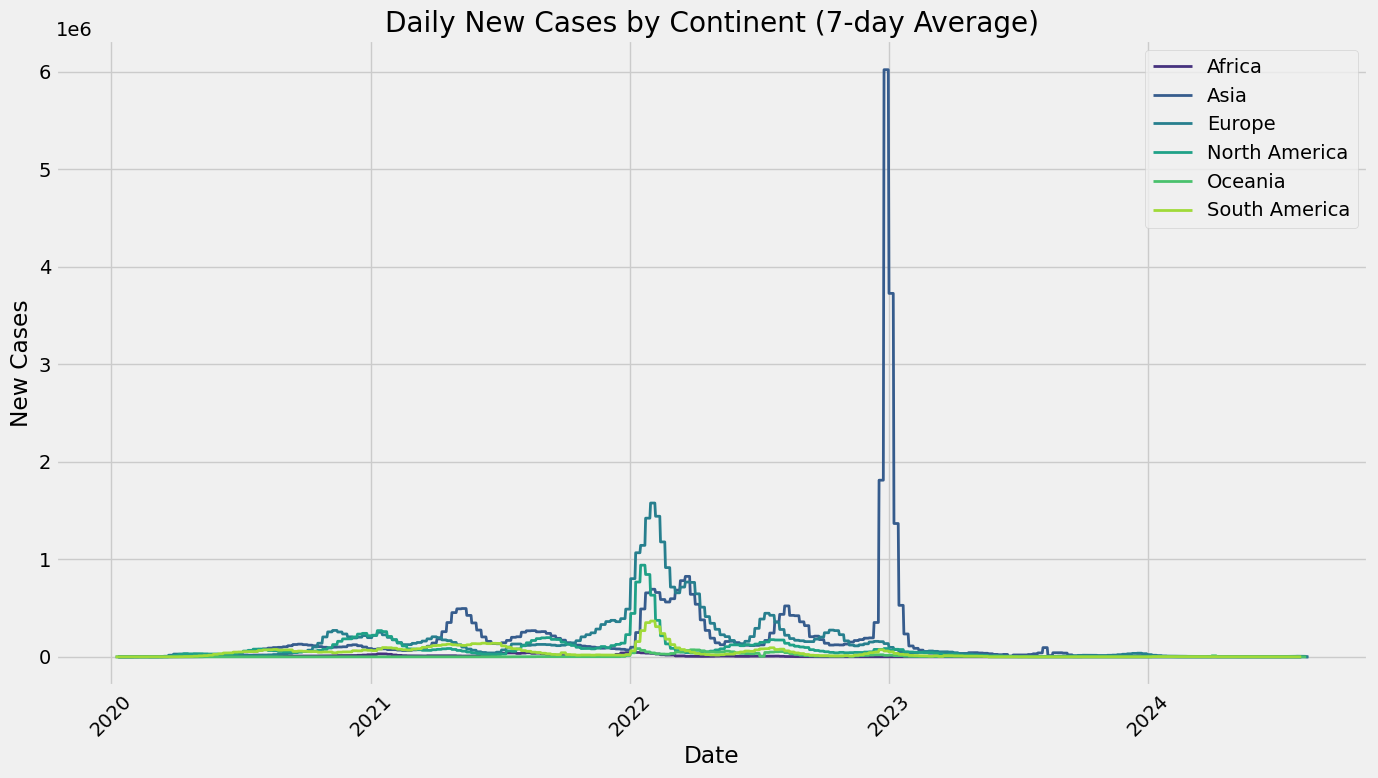

In [10]:
# Cell 10: Regional analysis
# Analyze data by continent
continent_data = df_clean.groupby(['continent', 'date']).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'people_vaccinated': 'sum'
}).reset_index()

# Calculate 7-day moving averages for continents
continent_data['new_cases_7day_avg'] = continent_data.groupby('continent')['new_cases'].transform(
    lambda x: x.rolling(7).mean()
)
continent_data['new_deaths_7day_avg'] = continent_data.groupby('continent')['new_deaths'].transform(
    lambda x: x.rolling(7).mean()
)

# Plot cases by continent
continents = continent_data['continent'].unique()
plt.figure(figsize=(14, 8))
for continent in continents:
    cont_data = continent_data[continent_data['continent'] == continent]
    plt.plot(cont_data['date'], cont_data['new_cases_7day_avg'], label=continent, linewidth=2)

plt.title('Daily New Cases by Continent (7-day Average)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Cell 11: Key insights and summary
# Get the latest date in the dataset
latest_date = df_clean['date'].max()

# Calculate global totals
total_cases = latest_data['total_cases'].sum()
total_deaths = latest_data['total_deaths'].sum()
total_vaccinated = latest_data['people_vaccinated'].sum()
world_population = latest_data['population'].sum()
global_vax_rate = (total_vaccinated / world_population) * 100

print(f"COVID-19 GLOBAL SNAPSHOT (as of {latest_date.strftime('%Y-%m-%d')})")
print("=" * 50)
print(f"Total confirmed cases worldwide: {total_cases:,.0f}")
print(f"Total confirmed deaths worldwide: {total_deaths:,.0f}")
print(f"Global case fatality rate: {(total_deaths/total_cases)*100:.2f}%")
print(f"Global vaccination rate: {global_vax_rate:.1f}%")
print("\n")

# Top insights
print("KEY INSIGHTS:")
print("1. The countries with the highest total cases are:")
for i, row in top_countries_cases.iterrows():
    print(f"   {i+1}. {row['location']}: {row['total_cases']:,.0f} cases")

print("\n2. Vaccination progress varies significantly across countries:")
top_vax = vaccination_data.nlargest(5, 'full_vaccination_rate')
bottom_vax = vaccination_data.nsmallest(5, 'full_vaccination_rate')
print(f"   Highest vaccination rates: {', '.join(top_vax['location'].head(3).tolist())}")
print(f"   Lowest vaccination rates: {', '.join(bottom_vax['location'].head(3).tolist())}")

print("\n3. Case fatality rates show substantial variation:")
top_cfr_list = top_cfr['location'].head(3).tolist()
print(f"   Highest CFRs: {', '.join(top_cfr_list)}")

# Calculate global new cases trend
recent_cases = global_by_date[global_by_date['date'] > (latest_date - timedelta(days=30))]
trend = "increasing" if recent_cases['new_cases_7day_avg'].iloc[-1] > recent_cases['new_cases_7day_avg'].iloc[0] else "decreasing"
print(f"\n4. Global cases are currently {trend} based on the last 30 days of data.")

COVID-19 GLOBAL SNAPSHOT (as of 2024-08-14)
Total confirmed cases worldwide: 1,736,385,671
Total confirmed deaths worldwide: 15,373,486
Global case fatality rate: 0.89%
Global vaccination rate: 70.9%


KEY INSIGHTS:
1. The countries with the highest total cases are:
   95. High-income countries: 429,044,049 cases
   236. Upper-middle-income countries: 251,753,518 cases
   70. European Union (27): 185,822,587 cases
   234. United States: 103,436,829 cases
   43. China: 99,373,219 cases
   127. Lower-middle-income countries: 91,954,400 cases
   100. India: 45,041,748 cases
   75. France: 38,997,490 cases
   81. Germany: 38,437,756 cases
   29. Brazil: 37,511,921 cases

2. Vaccination progress varies significantly across countries:
   Highest vaccination rates: Gibraltar, Tokelau, Qatar
   Lowest vaccination rates: Burundi, Yemen, Haiti

3. Case fatality rates show substantial variation:
   Highest CFRs: Yemen, Sudan, Syria

4. Global cases are currently decreasing based on the last 30 da